# Classification

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore')
# plt.rc('font', family='NanumBarunGothic')

In [2]:
!nvidia-smi

Wed Jun  2 06:37:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Load Data - Colab

In [5]:
from google.colab import drive

drive.mount('content/')

Mounted at content/


In [14]:
!ls -l 'content/MyDrive/Colab Notebooks/PJ2'

total 8484630
-rw------- 1 root root     212678 May  6 06:37 classification_0506.ipynb
-rw------- 1 root root    1949639 May 15 05:15 classification_0515.ipynb
-rw------- 1 root root    3142039 May 22 00:37 classification_0521.ipynb
-rw------- 1 root root    2619343 Jun  2 06:27 classification_0531.ipynb
-rw------- 1 root root      84756 Jun  2 06:42 classification.ipynb
-rw------- 1 root root 3002026756 May 15 00:38 images2.zip
-rw------- 1 root root 2117426751 May 26 06:16 images_v4.zip
-rw------- 1 root root 3001910640 May 15 00:25 images.zip
-rw------- 1 root root  558886296 Jun  2 06:27 Xception_99.h5


In [15]:
!unzip 'content/MyDrive/Colab Notebooks/PJ2/images_v4.zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: images_v4/13733/IMG_0395_55.jpg  
  inflating: images_v4/13733/IMG_0395_56.jpg  
  inflating: images_v4/13733/IMG_0395_57.jpg  
  inflating: images_v4/13733/IMG_0395_58.jpg  
  inflating: images_v4/13733/IMG_0395_59.jpg  
  inflating: images_v4/13733/IMG_0395_6.jpg  
  inflating: images_v4/13733/IMG_0395_60.jpg  
  inflating: images_v4/13733/IMG_0395_61.jpg  
  inflating: images_v4/13733/IMG_0395_62.jpg  
  inflating: images_v4/13733/IMG_0395_63.jpg  
  inflating: images_v4/13733/IMG_0395_64.jpg  
  inflating: images_v4/13733/IMG_0395_65.jpg  
  inflating: images_v4/13733/IMG_0395_66.jpg  
  inflating: images_v4/13733/IMG_0395_67.jpg  
  inflating: images_v4/13733/IMG_0395_68.jpg  
  inflating: images_v4/13733/IMG_0395_69.jpg  
  inflating: images_v4/13733/IMG_0395_7.jpg  
  inflating: images_v4/13733/IMG_0395_70.jpg  
  inflating: images_v4/13733/IMG_0395_71.jpg  
  inflating: images_v4/13733/IMG_0395_72.jpg  
  inflating: images_v4/137

# Load Data - Jupyter Notebook

In [ ]:
!ls -l 'datasets'

In [ ]:
!unzip 'datasets/images_v4.zip'

In [ ]:
!ls -l 'images_v4'

# Load Images

In [16]:
from keras.preprocessing.image import ImageDataGenerator

data_dir = 'images_v4'

gen = ImageDataGenerator(rescale = 1./255,
                          rotation_range = 40,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True,
                          vertical_flip = True,
                         validation_split = 0.3)

train_data = gen.flow_from_directory(data_dir,
                                     batch_size = 64,
                                     class_mode = 'categorical',
                                     target_size = (200,200),
                                     subset = 'training')

valid_data = gen.flow_from_directory(data_dir,
                                     batch_size = 64,
                                     class_mode = 'categorical',
                                     target_size = (200,200),
                                     subset = 'validation',
                                     shuffle = False)

n_classes = train_data.num_classes
print(f'Number of Classes : {n_classes}')


# key : label, value : id
label_id = {value : key for key, value in train_data.class_indices.items()}
# print(label_id)

# key : id, value : name
id_name = pd.read_csv(data_dir + '/indicate.txt',sep = ' ', names = ['id', 'name'])
id_name = dict(zip(id_name['id'], id_name['name']))
# print(id_name)

# key : label, value : name
indicate = {LABEL : id_name[int(ID)] for LABEL, ID in label_id.items()}
for label, name in indicate.items() :
    print(f'Label : {label:2d}\tName : {name}')

Found 25072 images belonging to 20 classes.
Found 10734 images belonging to 20 classes.
Number of Classes : 20
Label :  0	Name : 농심_츄파춥스
Label :  1	Name : 롯데_칸쵸컵95g
Label :  2	Name : 롯데_아몬드빼빼로1500
Label :  3	Name : 롯데_초코빼빼로1500
Label :  4	Name : 롯데_허쉬밀크초콜릿
Label :  5	Name : 롯데_씨리얼오트컵
Label :  6	Name : 오리온_다이제초코
Label :  7	Name : 프링글스_오리지날53g
Label :  8	Name : 매일_페레로로쉐5구
Label :  9	Name : 롯데_드림카카오56%
Label : 10	Name : 롯데_크런키더블크런치바
Label : 11	Name : 마즈_스니커즈땅콩
Label : 12	Name : 서영_홀스레몬맛
Label : 13	Name : 롯데_허쉬쿠앤크초콜릿
Label : 14	Name : 크라운_마이쮸딸기
Label : 15	Name : 롯데_쥬시후레쉬스틱팩껌
Label : 16	Name : 롯데_자일리톨용기껌52g
Label : 17	Name : 코카_코카콜라제로캔250ml
Label : 18	Name : 코카_코카콜라캔250ml
Label : 19	Name : 롯데_칠성사이다캔250ml


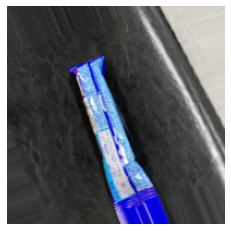

In [17]:
plt.imshow(train_data[0][0][0])
plt.axis(False)
plt.show()

# Functions

## Print Score

In [18]:
def print_score(model, data) :
    loss, acc = model.evaluate(data)
    
    df = pd.DataFrame([[loss, acc]], columns = ['Loss', 'Accuracy'])
    df.rename(index = {0 : 'Score'}, inplace = True)
    display(df)

## Plot Score

In [19]:
def plot_score(*hists) :
    colors = sns.color_palette('husl', 2)[::-1]
    EPOCHS = 0 # range(EPOCHS)
    LOSS = []
    VAL_LOSS = []
    ACC = []
    VAL_ACC = []
    
    for hist in hists :
        EPOCHS += len(hist.epoch)
        LOSS += hist.history['loss']
        VAL_LOSS += hist.history['val_loss']
        ACC += hist.history['accuracy']
        VAL_ACC += hist.history['val_accuracy']
    else :
        EPOCHS = range(EPOCHS)
        
    plt.figure(figsize = (18,6))
    
    
    # ------------------------
    #  Plot Train & Test Loss
    # ------------------------
    plt.subplot(1,2,1)
    plt.plot(EPOCHS, LOSS, color = colors[0], label = 'Train')
    plt.plot(EPOCHS, VAL_LOSS, color = colors[1], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train & Valid Loss')
    plt.legend()

    
    # ----------------------------
    #  Plot Train & Test Accuracy
    # ----------------------------
    plt.subplot(1,2,2)
    plt.plot(EPOCHS, ACC, color = colors[0], label = 'Train')
    plt.plot(EPOCHS, VAL_ACC, color = colors[1], label = 'Valid')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train & Valid Accuracy')
    plt.axhline(0.9, color = 'red', linewidth = 1, linestyle = '--')
    plt.legend()


    plt.show()

## Wrong Image Plot
* 반드시 데이터의 **shuffle**을 **False**로 설정

In [20]:
def wrong_img(model, data) :
    y = data.labels[data.index_array] # Real
    pred = model.predict_classes(data) # Prediction
    
    wrong_bool = (pred != y)
    wrong_idx = np.where(wrong_bool)[0]
    BATCH_SIZE = data.batch_size
#     indicate = {value : key for key, value in data.class_indices.items()} # Label name
    

    if len(wrong_idx) >= 9 : # 틀린 개수 9개 이상 => 9개 plot
        check_idx = np.random.choice(wrong_idx, 9, replace = False) # 틀린 9개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (16,16))
        for i, idx in enumerate(check_idx) :
            plt.subplot(3,3,i+1)
            plt.imshow(data[idx // BATCH_SIZE][0][idx % BATCH_SIZE])
            plt.title(f'Real : {indicate[y[idx]]}\nPred : {indicate[pred[idx]]}', fontsize = 14, pad = 10)
            plt.axis(False)
            
        plt.show()
    elif len(wrong_idx) >= 4 : # 틀린 개수 4개 이상 => 4개 plot
        check_idx = np.random.choice(wrong_idx, 4, replace = False) # 틀린 4개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (10,10))
        for i, idx in enumerate(check_idx) :
            plt.subplot(2,2,i+1)
            plt.imshow(data[idx // BATCH_SIZE][0][idx % BATCH_SIZE])
            plt.title(f'Real : {indicate[y[idx]]}\nPred : {indicate[pred[idx]]}', fontsize = 14, pad = 10)
            plt.axis(False)
            
        plt.show()
    elif len(wrong_idx) >= 1 : # 틀린 개수 4개 미만 => 1개 plot
        check_idx = np.random.choice(wrong_idx, 1, replace = False) # 틀린 1개 비복원 추출
        print(f'\n* CHECK INDEX : {check_idx}\n')
        
        plt.figure(figsize = (4,4))
        for i, idx in enumerate(check_idx) :
            plt.subplot(1,1,i+1)
            plt.imshow(data[idx // BATCH_SIZE][0][idx % BATCH_SIZE])
            plt.title(f'Real : {indicate[y[idx]]}\nPred : {indicate[pred[idx]]}', fontsize = 14, pad = 10)
            plt.axis(False)
            
        plt.show()
    else : print('All Correct!!')

## Confusion Matrix Plot

In [21]:
def confusion_plot(model, data) :
    y = data.labels[data.index_array] # Real
    pred = model.predict_classes(data) # Prediction

    
    # Confusion Matrix
    confusion = pd.DataFrame(confusion_matrix(y, pred))
    confusion.rename(index = indicate, columns = indicate, inplace = True)

    display(confusion)

# Modeling

In [ ]:
%%time
from keras.applications import xception
from keras import models, layers, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

'''
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 15, 
                   verbose = 1)
mc = ModelCheckpoint('Xception_augmentation.h5', 
                     monitor = 'val_accuracy', 
                     mode = 'max', 
                     save_best_only = True,
                     verbose = 1)
'''

    
#
# Modeling
#

xception_base = xception.Xception(include_top = False,
                         input_shape = (200,200,3))
for layer in xception_base.layers :
    layer.trainable = False
model = models.Sequential()
model.add(xception_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(n_classes, activation = 'softmax'))


#
# Train 1
#

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.000001),
              metrics = ['accuracy'])
model.summary()
hist1 = model.fit(train_data,
                  epochs = 20,
                #   callbacks = [es, mc],
                  validation_data = valid_data)


#
# Train 2
#

'''
flag = False
for layer in model.layers[0].layers :
    if layer.name.startswith('block12') :
        flag = True
    layer.trainable = True if flag else False
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.0000005),
              metrics = ['accuracy'])
model.summary()
hist2 = model.fit(train_data,
                  epochs = 50,
                  callbacks = [es, mc],
                  validation_data = valid_data)
'''


#
# Train 3
#

for layer in model.layers[0].layers :
    layer.trainable = True
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(lr = 0.0000005),
              metrics = ['accuracy'])
model.summary()
hist3 = model.fit(train_data,
                  epochs = 50,
                #   callbacks = [es, mc],
                  validation_data = valid_data)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                5140      
Total params: 46,556,988
Trainable params: 25,695,508
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/20
392/392 [==============================] - 542s 1s/step - loss: 2.8681 - accuracy: 0.163

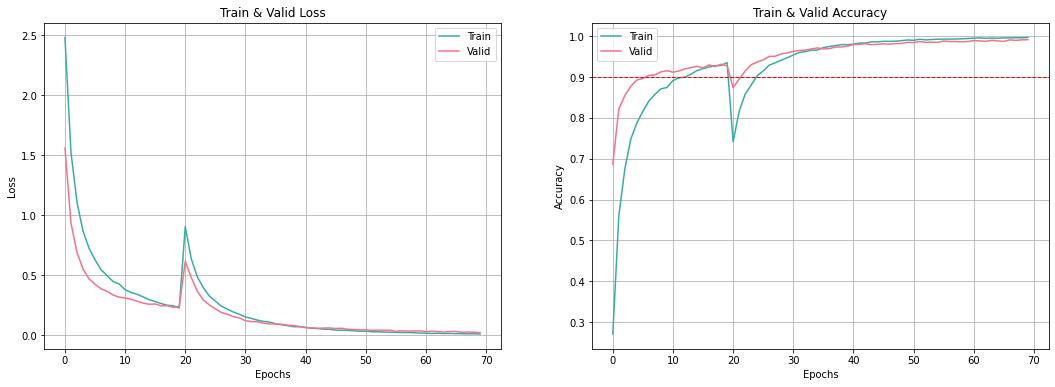

In [ ]:
plot_score(hist1, hist3)

In [23]:
from keras import models
model = models.load_model('content/MyDrive/Colab Notebooks/PJ2/Xception_99.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25690368  
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                5140      
Total params: 46,556,988
Trainable params: 46,502,460
Non-trainable params: 54,528
_________________________________________________________________


In [24]:
print_score(model, valid_data)

168/168 [==============================] - 187s 833ms/step - loss: 0.0270 - accuracy: 0.9906


,Loss,Accuracy
Score,0.026979,0.990591



* CHECK INDEX : [9171 3025 9874 9185 9446 3052 9832 9865 1038]



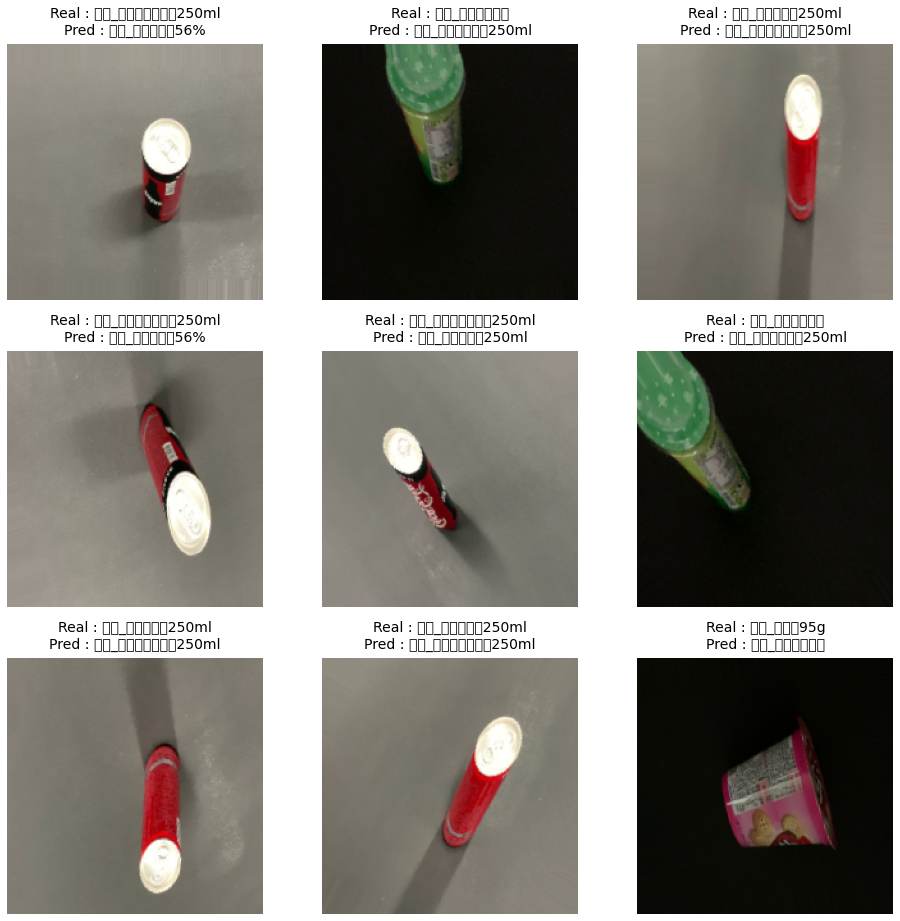

In [25]:
wrong_img(model, valid_data)

In [26]:
confusion_plot(model, valid_data)

,농심_츄파춥스,롯데_칸쵸컵95g,롯데_아몬드빼빼로1500,롯데_초코빼빼로1500,롯데_허쉬밀크초콜릿,롯데_씨리얼오트컵,오리온_다이제초코,프링글스_오리지날53g,매일_페레로로쉐5구,롯데_드림카카오56%,롯데_크런키더블크런치바,마즈_스니커즈땅콩,서영_홀스레몬맛,롯데_허쉬쿠앤크초콜릿,크라운_마이쮸딸기,롯데_쥬시후레쉬스틱팩껌,롯데_자일리톨용기껌52g,코카_코카콜라제로캔250ml,코카_코카콜라캔250ml,롯데_칠성사이다캔250ml
농심_츄파춥스,545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
롯데_칸쵸컵95g,0,568,0,0,0,3,2,1,0,0,0,0,0,0,1,0,0,0,0,0
롯데_아몬드빼빼로1500,0,0,541,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
롯데_초코빼빼로1500,0,0,0,525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
롯데_허쉬밀크초콜릿,0,0,0,0,549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
롯데_씨리얼오트컵,0,0,0,0,0,580,0,0,0,0,0,0,0,0,0,0,0,0,0,1
오리온_다이제초코,0,0,0,0,0,0,503,0,0,0,0,0,0,0,0,0,0,0,0,0
프링글스_오리지날53g,0,0,0,0,0,0,0,554,0,0,0,0,0,0,0,0,0,0,1,0
매일_페레로로쉐5구,0,0,0,0,0,0,0,0,522,0,0,0,1,0,0,0,0,0,0,0
롯데_드림카카오56%,0,0,0,0,0,0,0,0,0,519,0,0,0,0,0,0,0,0,0,0
